## Lineare Regression.
We want to build a model that allows us to forecast the data into the future.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression

pd.options.display.max_rows = 8

In [2]:
sns.set_style(style = 'white')
sns.set(rc = {'figure.figsize': (12,8), 
             'axes.facecolor': 'white',
             'axes.grid': True,'grid.color': '.7',
             'axes.linewidth': 1.0, 
             'grid.linestyle': u'-'}, font_scale = 1.0)
custom_colors = ['#193439', '#79ad9f', '#c49b60', '#ac1406']
sns.set_palette(custom_colors)

 I'm using a dataset with data from notebook 'Time Series Analysis. Change of Local Climate'
 
 https://github.com/okirsch/Time-Series-Analysis/blob/master/Time%20Series%20Analysis.%20Change%20of%20Local%20Climate..ipynb

In [3]:
df = pd.read_csv('weather_soltau.csv', index_col = 1)
df.index.names = ['Date']
df

,Date,Precipitation,Temperature,Wind
Date,,,,
1947-07-21,1947-07-21,0.0,19.0,20.0
1947-07-22,1947-07-22,0.0,22.3,20.0
1947-07-23,1947-07-23,0.0,24.3,20.0
1947-07-24,1947-07-24,5.0,22.5,20.0
...,...,...,...,...
2020-11-27,2020-11-27,0.0,6.0,16.0
2020-11-28,2020-11-28,0.0,2.9,30.0
2020-11-29,2020-11-29,0.0,1.7,13.0
2020-11-30,2020-11-30,21.0,1.6,28.0


 I want to use some autoregression methods to do forecasting.  I can only do that if the data is autocorrelated,   that the value in a specific temporal point depends on previous values:


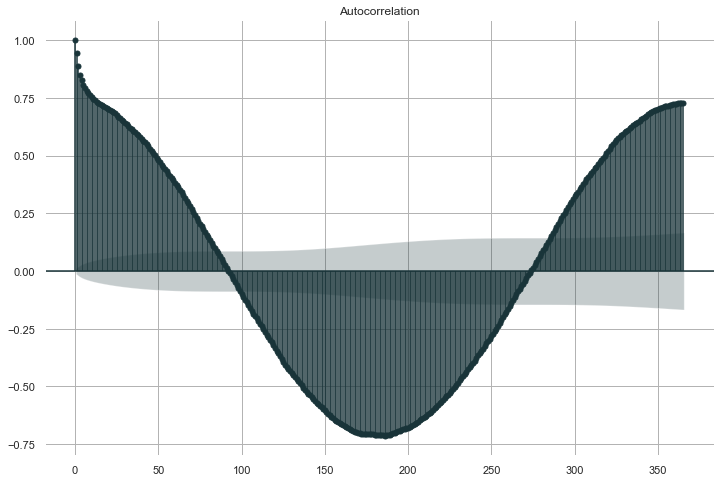

In [4]:
autocorr=plot_acf(df['Temperature'], lags = 365)  # data from one-year range


Values outside of the shadowed area has a strong probability (>95% confidence) of being autocorrelated.
We can see the swing in positive and negative correlation. The temperature values change across summer and winter seasons.

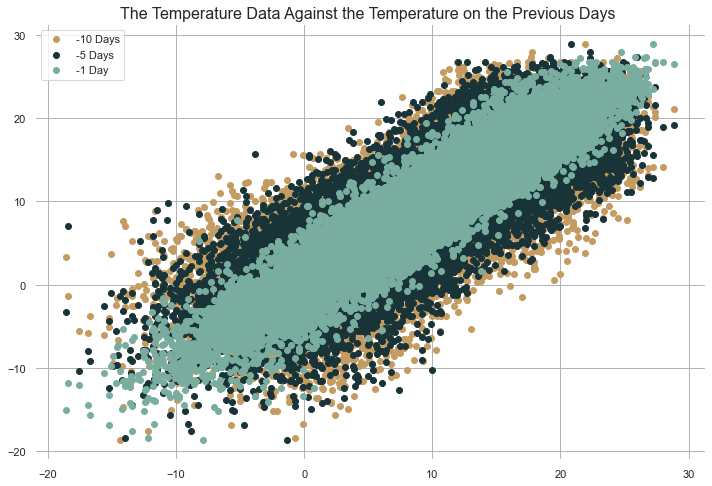

In [5]:
colors = ['#c49b60','#193439', '#79ad9f']
plt.scatter(df['Temperature'],df['Temperature'].shift(10), c=colors[0], label='-10 Days')
plt.scatter(df['Temperature'],df['Temperature'].shift(5), c=colors[1],label='-5 Days')
plt.scatter(df['Temperature'],df['Temperature'].shift(1), c=colors[2],label='-1 Day')
plt.title('The Temperature Data Against the Temperature on the Previous Days ', fontsize=16) 

plt.legend()
plt.show()

We can see  a diagonal line of the plot that clearly shows a positive linear relationship.

#### Features creation
(construct a new features from existing data to train a machine learning model):

In [6]:
for x in range(1,11):
    df['t-' + str(x)] = df['Temperature'].shift(x)

In [7]:
df.dropna(inplace=True)

<AxesSubplot:>

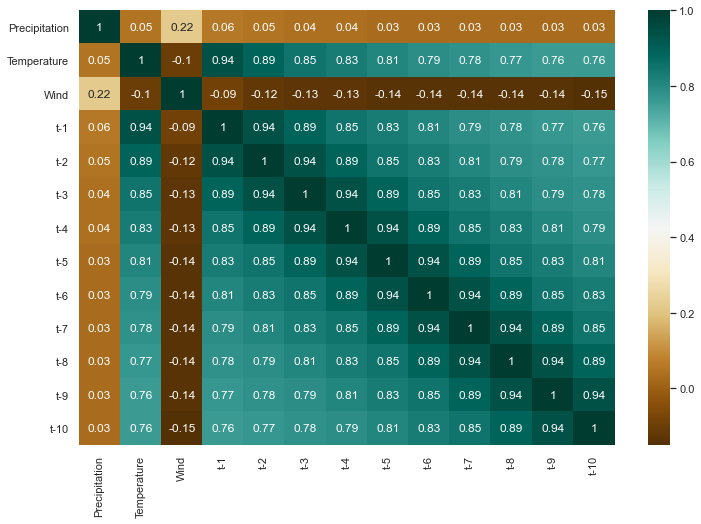

In [8]:
sns.heatmap(df.corr().round(2), cmap='BrBG', annot = True)

#### train/test split

In [9]:
X = df[['Precipitation', 'Wind',  't-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9', 't-10']]
y = df['Temperature']

In [10]:
X_train = X['1990-01-01':'2015-01-01']
X_test = X['2015-01-01':]

y_train = y['1990-01-01':'2015-01-01']
y_test = y['2015-01-01':]

Train the model using the training sets:

In [11]:
m = LinearRegression()
m.fit(X_train, y_train)
score = m.score(X_train, y_train)

print('Coefficient of determination R^2  on the training set:  {:.2f}'.format(m.score(X_train, y_train)))

Coefficient of determination R^2  on the training set:  0.90


Plot the results:

Text(0.5, 1.0, 'Training set')

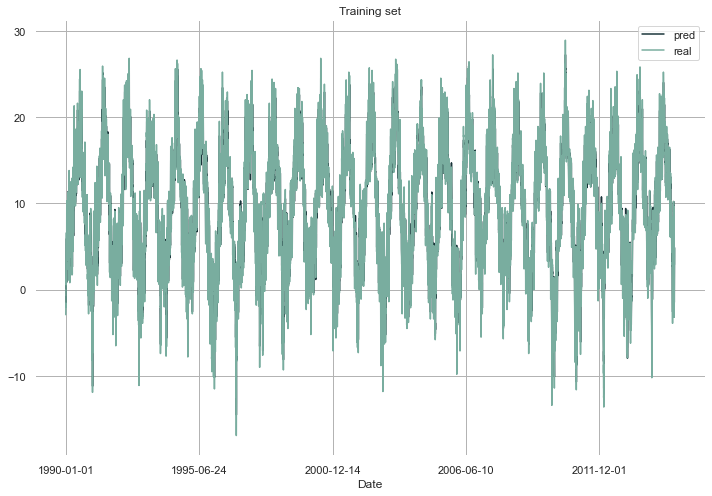

In [12]:
pred = pd.DataFrame({
    'pred': m.predict(X_train),
    'real': y_train})
pred.plot()
plt.title('Training set')

In [13]:
print('Coefficient of determination R^2  on the test set:  {:.2f}'.format(m.score(X_test, y_test)))

Coefficient of determination R^2  on the test set:  0.90


Make predictions using the testing set and plot:

In [14]:
pred_t = pd.DataFrame({
    'real_test' : y_test,
    'pred_test' : m.predict(X_test)})
pred_t

,real_test,pred_test
Date,,
2015-01-01,2.9,4.882698
2015-01-02,6.0,2.739658
2015-01-03,3.9,6.291590
2015-01-04,3.4,3.305065
...,...,...
2020-11-27,6.0,7.691071
2020-11-28,2.9,5.755710
2020-11-29,1.7,3.199676
2020-11-30,1.6,2.363275


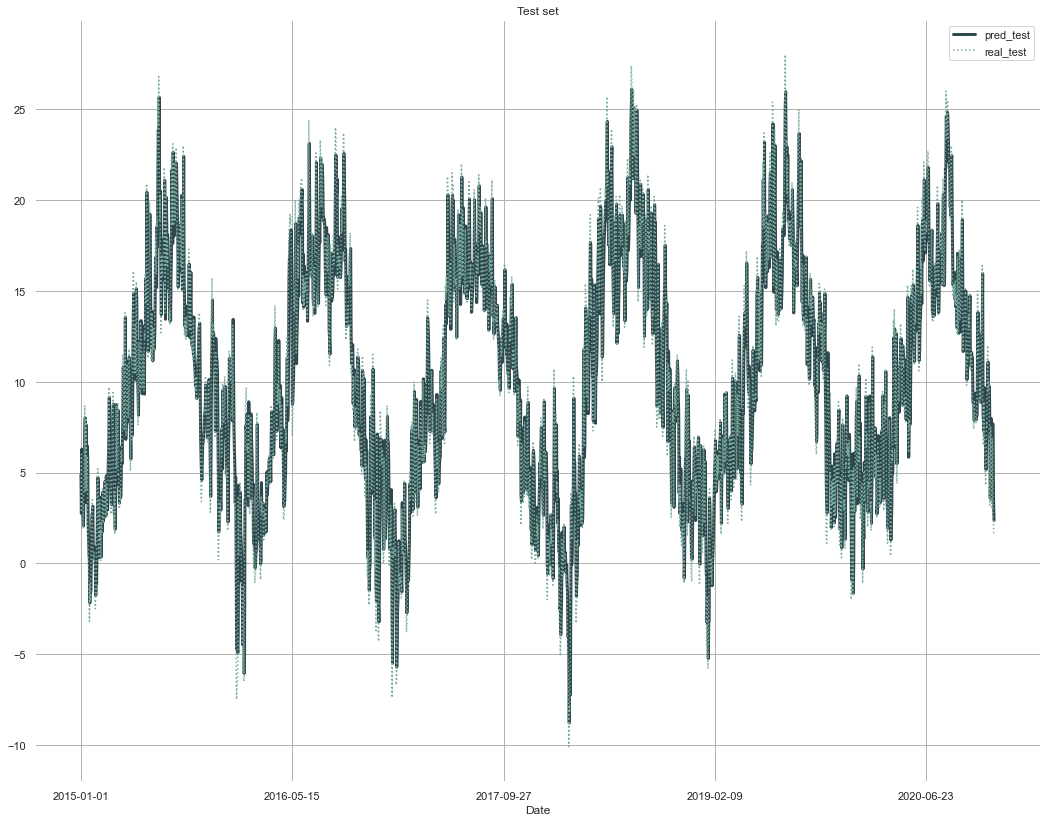

In [15]:
plt.figure(figsize = (18,14))

pred_t['pred_test'].plot(color='#193439', linewidth = 3, alpha=.9)
pred_t['real_test'].plot(color= '#79ad9f', linestyle = ':')

plt.title('Test set')
plt.legend(loc=0)
plt.show()